# Non-negative matrix factorization

Non-negative matrix factorization (NMF) is a method of matrix decomposition that aims
 to factorize a matrix into two non-negative matrices, with the goal of obtaining a
 low-rank approximation of the original matrix. NMF can be used for a variety of
 tasks, including image processing, text mining, and audio signal processing.

And the advantage over PCA is that the NMF is human-interpretable.

**Requirements:** all features must be non-negative (>=0)


In [35]:
import warnings
warnings.filterwarnings('ignore')

# Set up notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

home_directory = "C:/Users/rober/DataspellProjects/Machine-Learning-Sandbox"

operators = pd.read_csv(
    filepath_or_buffer=home_directory + "/data/08_rainbow_six/players_rainbow_six.csv"
)

## Create the model

- Create an instance of the `NMF` class. You can specify the number of components you
want to extract using the `n_components` parameter. You can also specify the solver to
use (`'cd'` for coordinate descent, `'mu'` for multiplicative update), the maximum number
 of iterations (`'max_iter'`), and other hyperparameters.

In [36]:
import numpy as np
from sklearn.decomposition import NMF

# Load data
data = operators[["time_played", "kills", "deaths", "wins", "losess"]].values

# Create NMF model
model = NMF(n_components=2, init='random', random_state=0)

## Fit the model

- Fit the NMF model to your data using the `fit` method.

In [37]:
# Fit model to data
W = model.fit(data)
nmf_features = W.transform(data)

## Extract the non-negative matrices from the NMF model using the transform method

*Note*: Remember it is a dimensionality reduction technique that factorizes a
non-negative matrix into two non-negative matrices, namely the **features matrix** and
the **components matrix**.

- The **NMF features** refer to the rows of the features matrix, which represent the
most significant patterns or characteristics of the original data.

- The **NMF components**, on the other hand, refer to the columns of the components
matrix, which represent the weights of the features used to reconstruct the original data.

In [38]:
H = model.components_

print("Original data: ")
print(data, "\n")
print("Model: ")
print(W, "\n")
print("NMF features: ")
print(nmf_features, "\n")
print("Components for each sample: ")
print(H)

Original data: 
[[ 2105 39693 27208  3963  2524]
 [ 2440 52978 31853  6332  2716]
 [ 2184 32141 31353  4525  2892]
 ...
 [  118  1952  1758   250   145]
 [ 1039 16925 13373  1916  1479]
 [  797 12330 11086  1590  1167]] 

Model: 
NMF(init='random', n_components=2, random_state=0) 

NMF features: 
[[ 53.5012496  282.26545197]
 [ 61.46527282 414.2501265 ]
 [ 64.04448815 154.50040445]
 ...
 [  3.55946273  10.55842781]
 [ 26.81640383 106.00237562]
 [ 22.51191199  66.58977747]] 

Components for each sample: 
[[ 29.58960099 302.39042514 473.24481724  40.6965661   51.38820211]
 [  2.13921554  83.09742091   6.54388595   8.43384377   0.        ]]



- Reconstruct the sample using the new NMF features and the components of each sample

In [39]:
print("Reconstructed data:")
print(np.dot(nmf_features, H))

Reconstructed data:
[[ 2186.90726951 39633.79668293 27166.3020156   4557.89986378
   2749.33302756]
 [ 2704.90320566 53009.62710339 31798.92738536  5995.14638589
   3158.58986231]
 [ 2225.56051615 32205.02513888 31319.75511629  3909.42301852
   3291.1311009 ]
 ...
 [  127.90983486  1953.72556901  1753.59043796   233.90604098
    182.91439031]
 [ 1020.24861864 16917.5477801  13384.39158773  1985.34302614
   1378.04677997]
 [  808.56838004 12340.82540385 11089.4015839   1477.76529401
   1156.84668306]]


 We first created a numpy array `data` that contains our input data. We then create an
 instance of the `NMF` class with `n_components=2`, which means we want to extract two
 non-negative matrices. We fit the model to the data using the `fit_transform` method,
 which returns the non-negative matrix `W`. We then extract the non-negative matrix `H`
 using the `components_` attribute.

Finally, we print out the original data, the non-negative matrices `W` and `H`, and the
reconstructed data, which is obtained by multiplying `W` and `H`.

## Summary

In summary, the NMF features and components are the two matrices that result from the
 NMF factorization process. The features represent the most significant patterns or
 characteristics of the data, while the components represent the weights of these
 features used to reconstruct the original data.

## Hyperparameter tunning (n_components)

Choosing the appropriate number of components is important to obtain a compact and
informative representation of the data. Here are some criteria that you can use to
select the right number of components:

- **Reconstruction error**: One way to choose the number of components is to calculate
the reconstruction error for different values of `n_components` and choose the value
that gives the lowest error. The reconstruction error measures how well the NMF model
 can reconstruct the original data. A lower reconstruction error indicates a better
 fit of the model to the data. You can use the `reconstruction_error()` method of the
 NMF object in sklearn to calculate the reconstruction error.

- **Domain knowledge**: Your knowledge of the domain can also guide the selection of
the number of components. For example, if you are working with text data and you know
that there are only a few main topics, you may choose a small number of components
that corresponds to those topics.

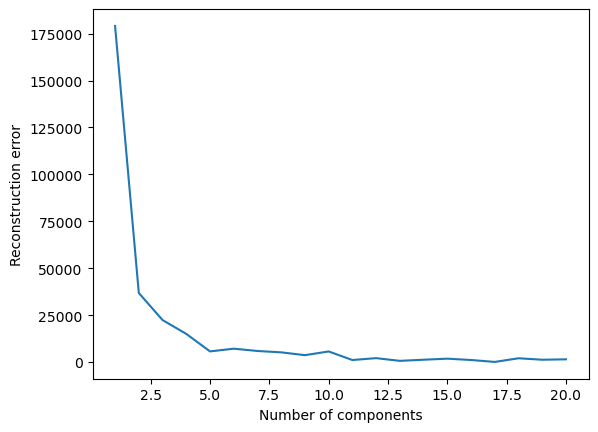

In [40]:
# create an NMF object
nmf = NMF()

# calculate the reconstruction error for different values of n_components
errors = []
for n in range(1, 21):
    nmf.set_params(n_components=n)
    nmf.fit(data)
    errors.append(nmf.reconstruction_err_)

# plot the reconstruction errors
import matplotlib.pyplot as plt
plt.plot(range(1, 21), errors)
plt.xlabel('Number of components')
plt.ylabel('Reconstruction error')
plt.show()

In addition to the number of components, there are other hyperparameters in the NMF
model that you can tune to improve the performance of the algorithm.

- `init`: The method used to initialize the NMF algorithm. The default is `'nndsvd'`,
which uses a non-negative double singular value decomposition for initialization.
Other options include `'random'` for random initialization and `'nndsvda'` for a more
 robust initialization method that is slower but more accurate.

- `solver`: The optimization algorithm used to fit the NMF model. The default is `'cd'`,
which uses coordinate descent. Other options include `'mu'` for multiplicative update
 and `'pg'` for projected gradient descent.

- `beta_loss`: The type of regularization used to constrain the NMF model. The default
is `'frobenius'`, which uses the Frobenius norm. Other options include
`'kullback-leibler'` for the Kullback-Leibler divergence and `'itakura-saito'` for
the Itakura-Saito divergence.

- `alpha`: The regularization parameter for the sparsity constraint. A higher value of
alpha leads to a sparser representation.

- `l1_ratio`: The regularization parameter for the sparsity constraint as a mixture of
L1 and L2 regularization. A value of 1 corresponds to pure L1 regularization, while a
 value of 0 corresponds to pure L2 regularization.

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

# create an NMF object
nmf = NMF()

# define the grid of hyperparameters to search over
param_grid = {
    'n_components': [5, 10, 15],
    'init': ['nndsvd', 'random'],
    'beta_loss': ['frobenius', 'kullback-leibler'],
    'alpha': [0.0, 0.1, 0.5],
}

# perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(nmf, param_grid=param_grid, cv=5, scoring=silhouette_score)
grid_search.fit(data)

# print the best hyperparameters
print(grid_search.best_params_)

{'alpha': 0.0, 'beta_loss': 'frobenius', 'init': 'nndsvd', 'n_components': 5}
